In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import linregress

In [2]:
df=pd.read_csv("censusCrimeClean.csv")

In [3]:
df

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [4]:
variables=df[['medIncome','ViolentCrimesPerPop']]

In [5]:
x=df[['medIncome']]

In [6]:
y=df[['ViolentCrimesPerPop']]

In [7]:
X_train = x[:-20]
X_test = x[-20:]
Y_train = y[:-20]
Y_test = y[-20:]


In [8]:
regr = linear_model.LinearRegression()


In [9]:
regr.fit(X_train, Y_train)


LinearRegression()

In [10]:
regr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [11]:
y_pred = regr.predict(X_test)


In [12]:
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))

Coefficient of determination: 0.27


In [13]:
slope, intercept, r, p, se = linregress(X_train, Y_train)


In [14]:
slope

-0.4710602288745808

In [15]:
df.shape

(1994, 102)

In [16]:
features=df.iloc[:,1:101]

In [17]:
features=pd.DataFrame(features)

In [18]:
columnNames=features.columns

In [19]:
columnNames.values

array(['fold', 'population', 'householdsize', 'racepctblack',
       'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21',
       'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban',
       'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
       'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc',
       'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
       'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
       'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
       'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
       'PctImmigRec10', 'PctRecentImmig', 'PctRecIm

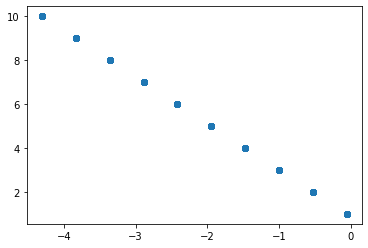

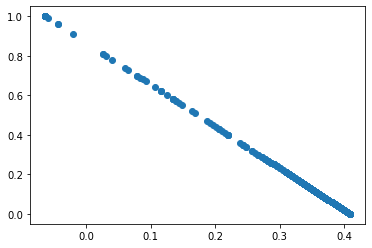

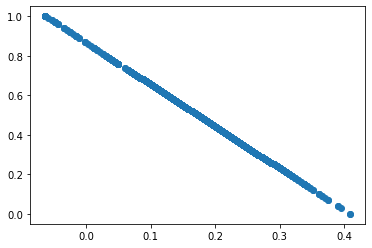

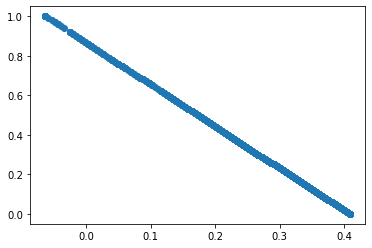

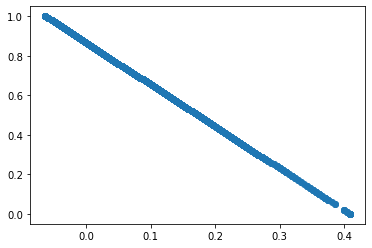

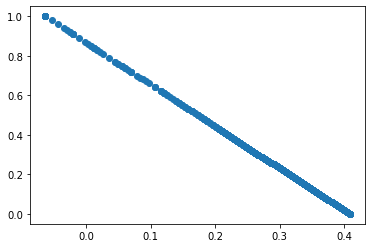

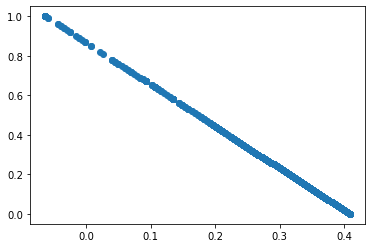

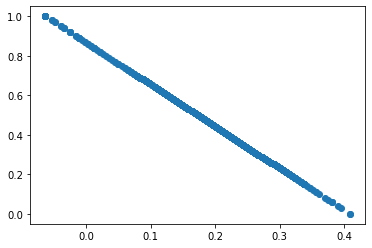

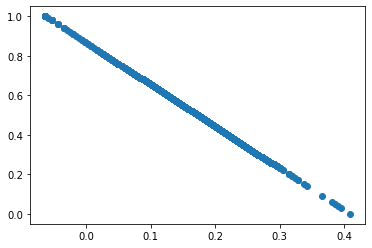

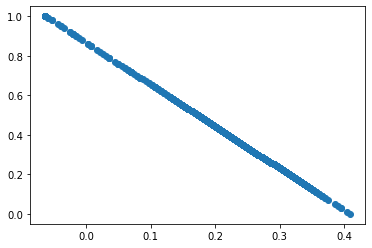

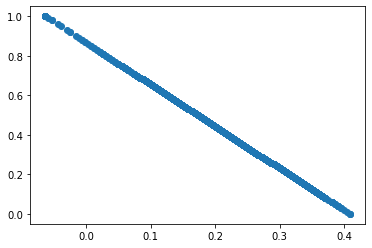

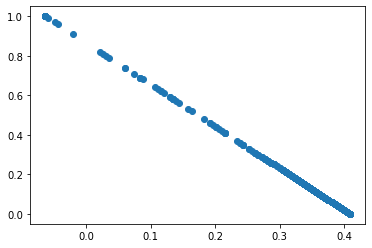

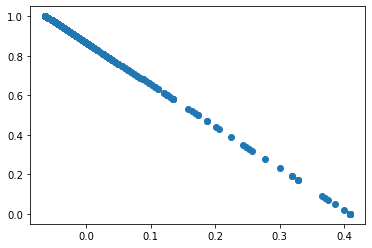

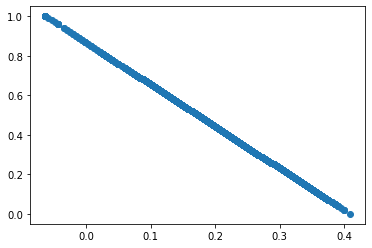

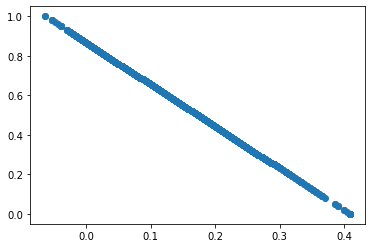

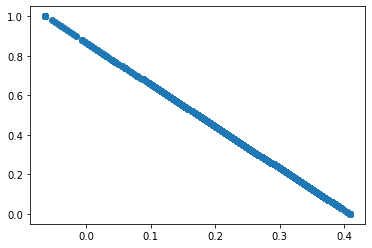

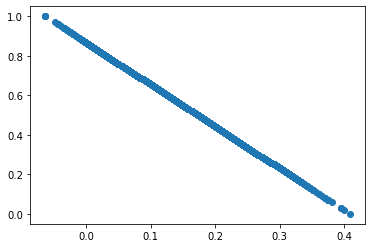

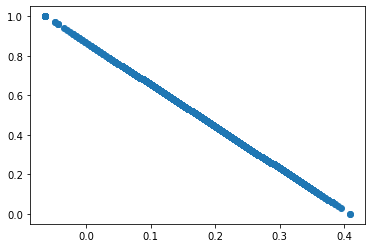

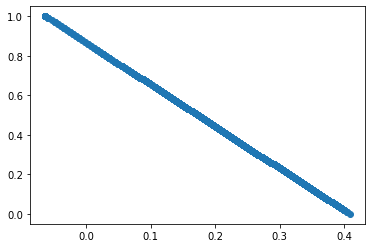

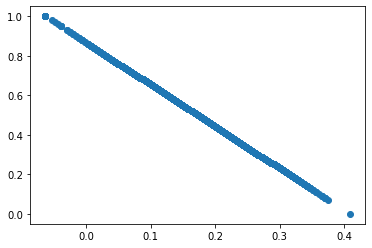

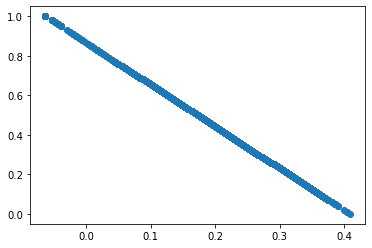

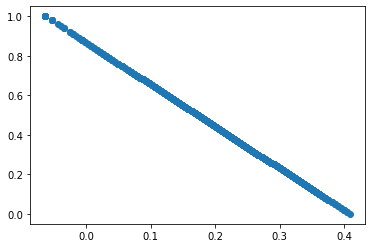

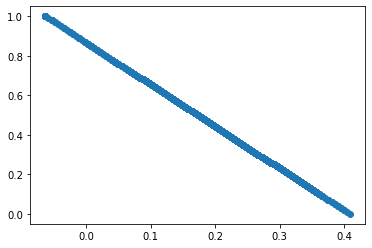

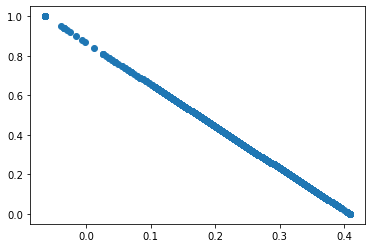

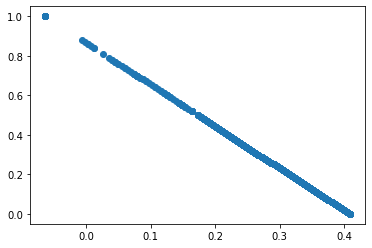

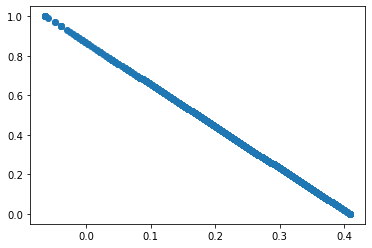

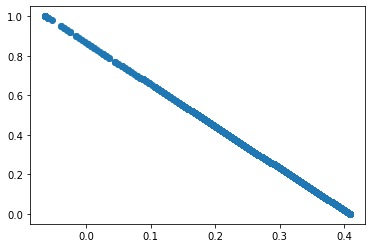

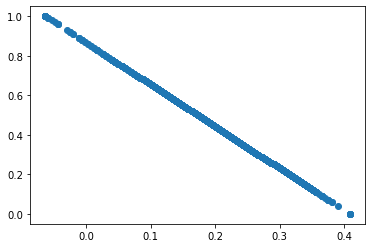

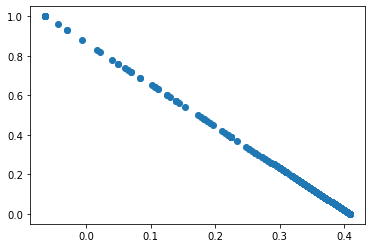

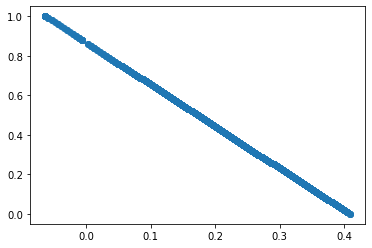

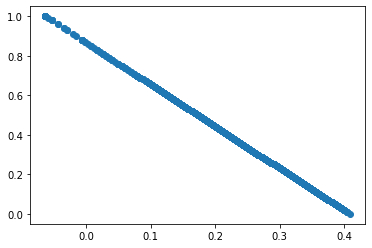

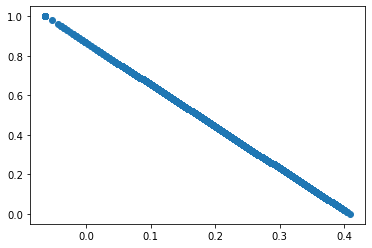

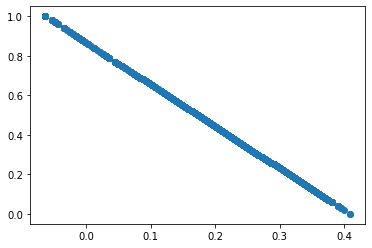

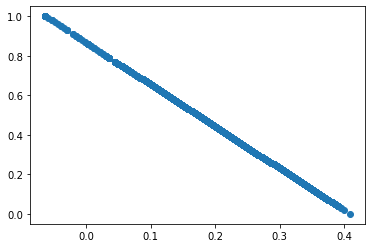

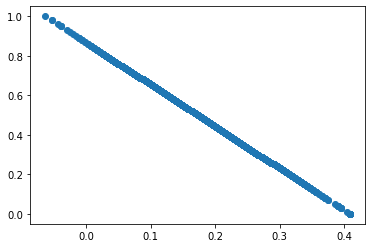

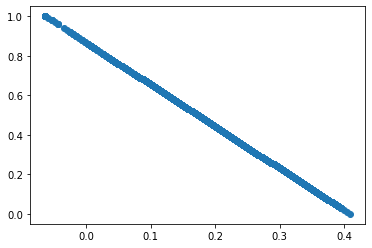

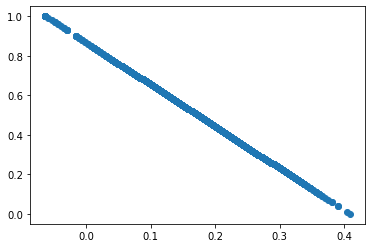

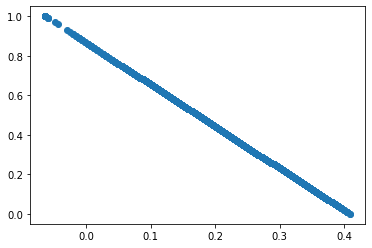

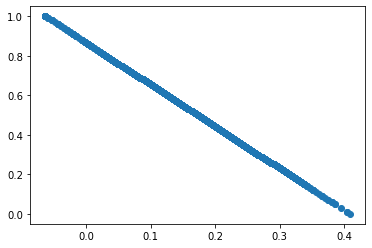

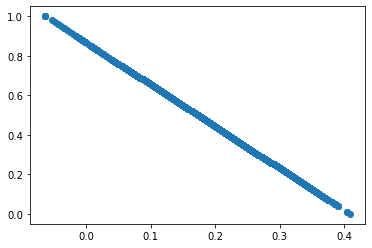

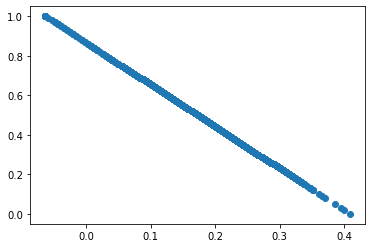

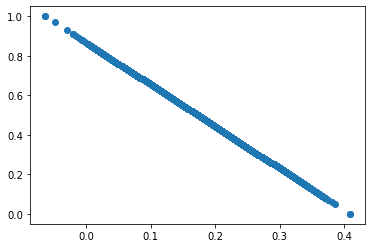

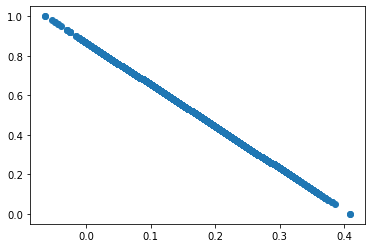

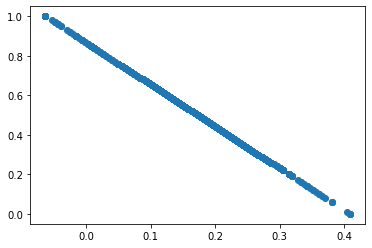

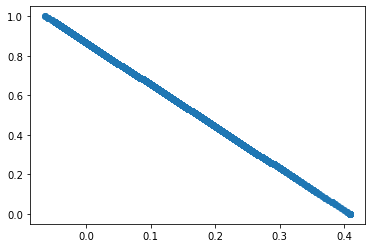

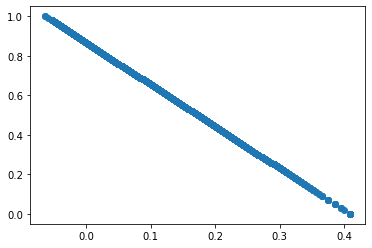

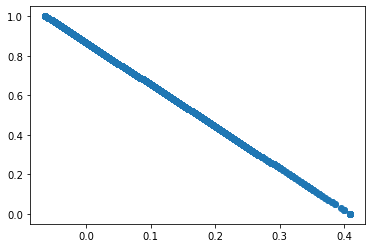

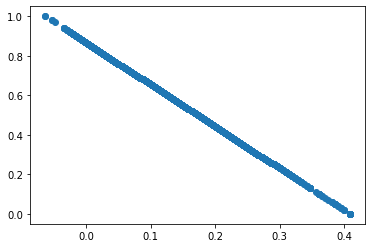

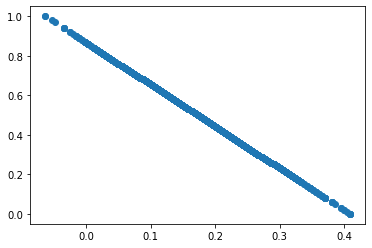

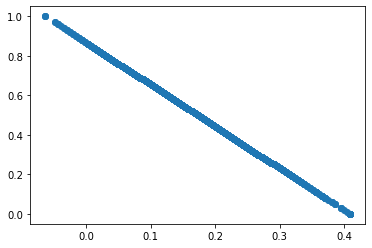

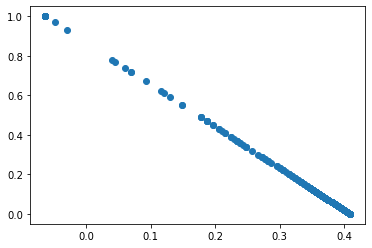

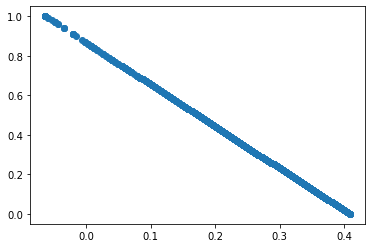

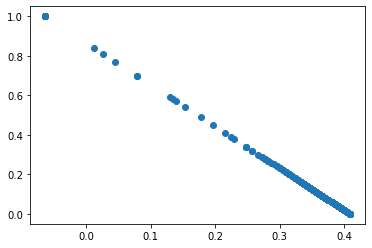

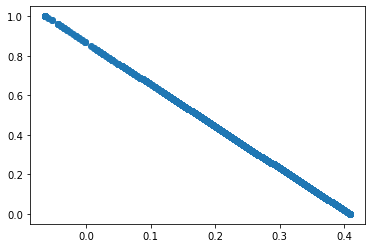

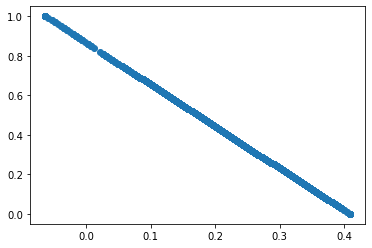

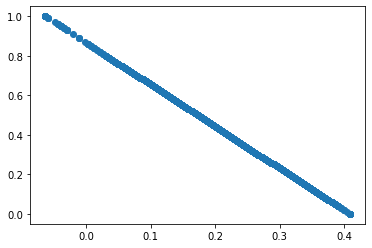

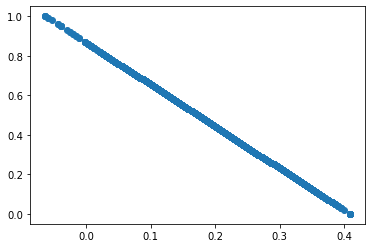

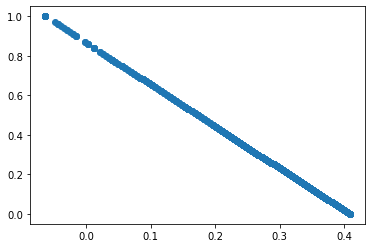

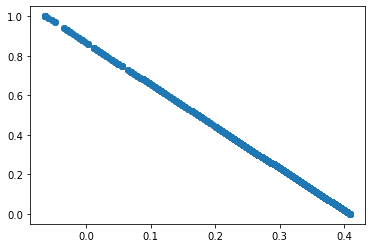

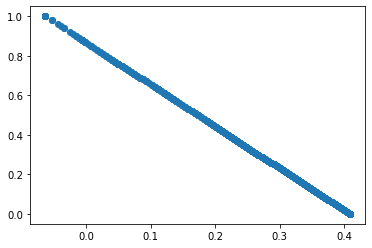

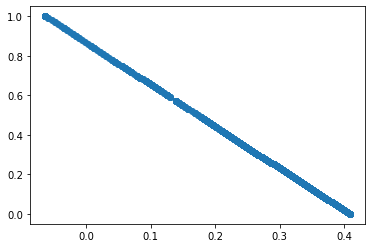

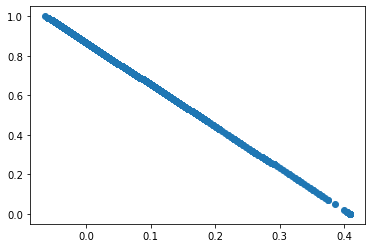

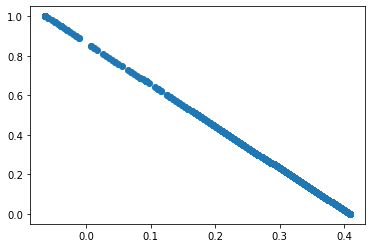

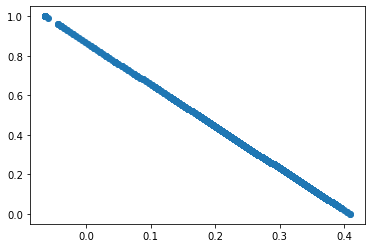

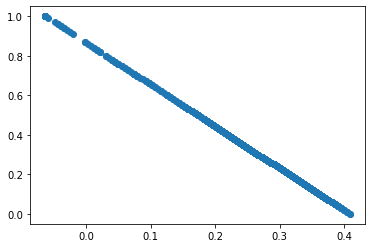

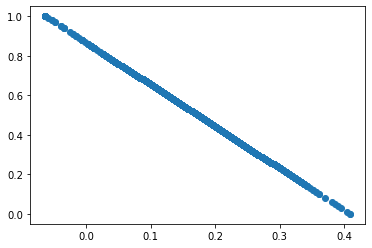

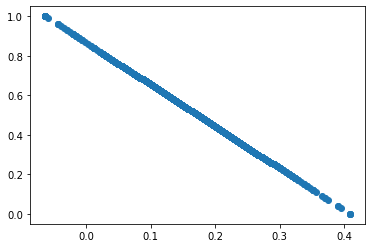

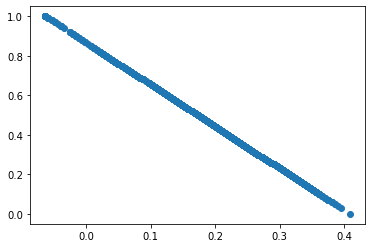

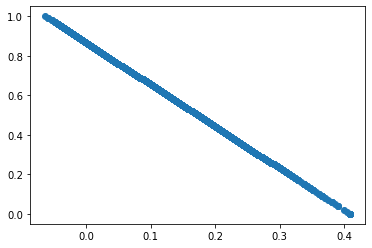

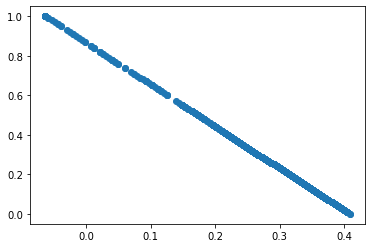

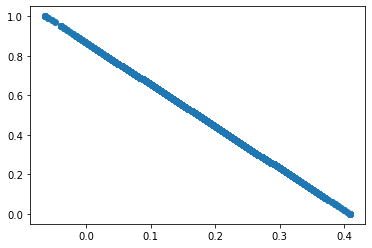

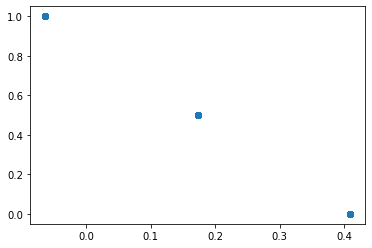

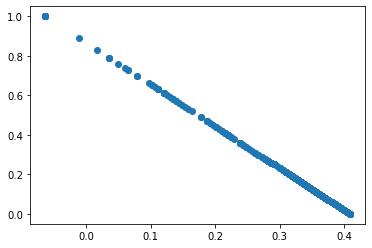

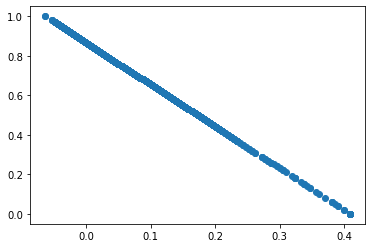

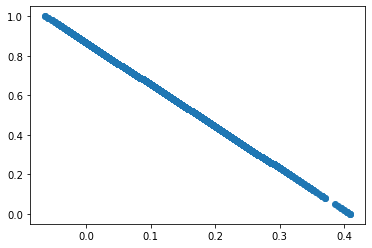

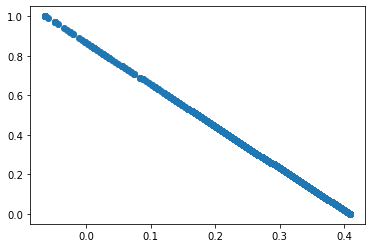

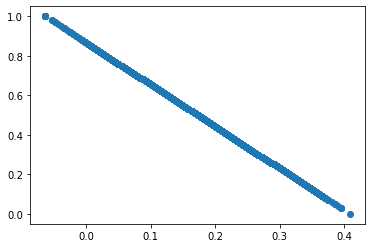

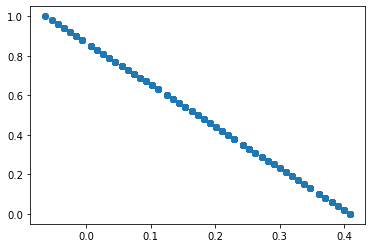

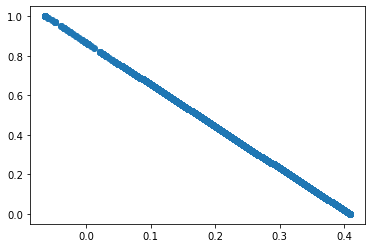

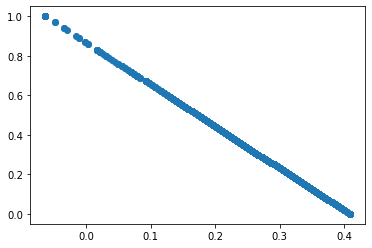

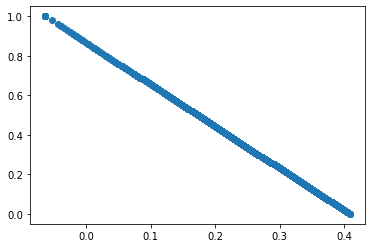

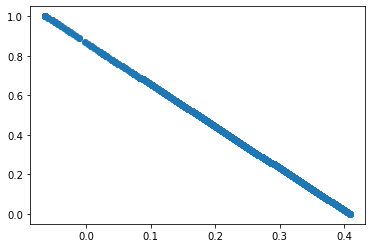

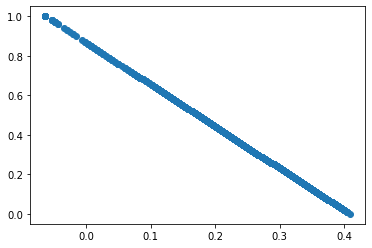

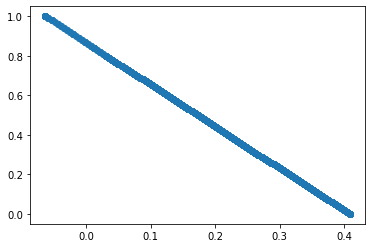

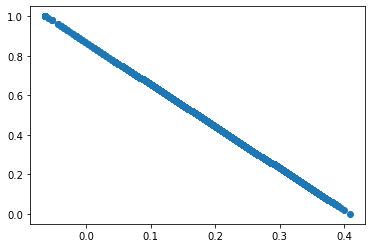

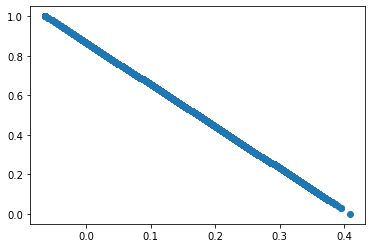

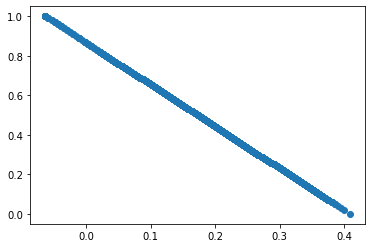

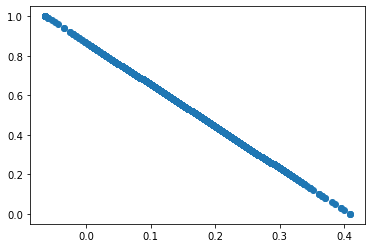

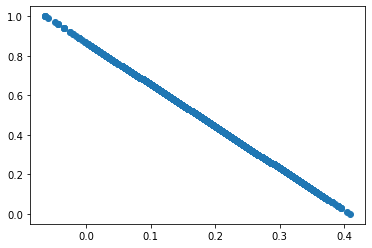

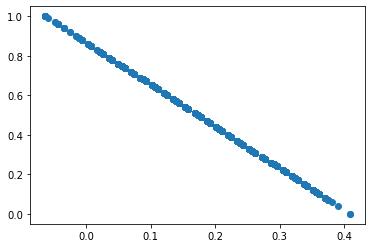

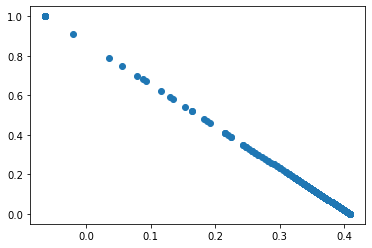

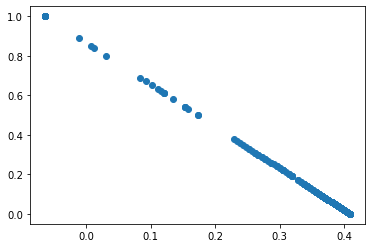

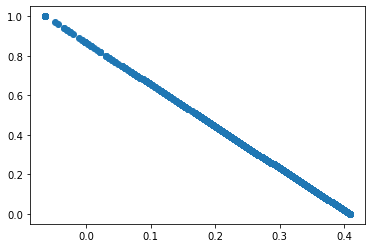

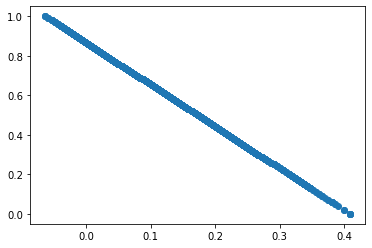

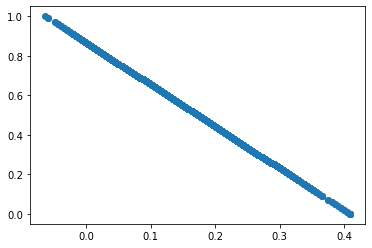

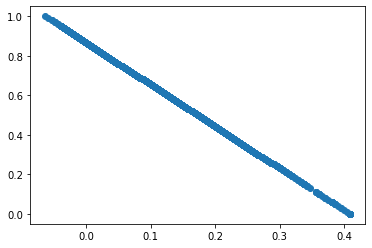

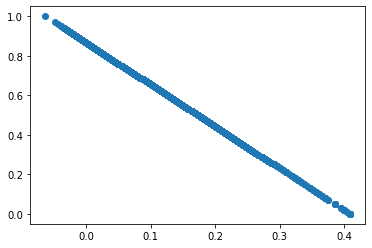

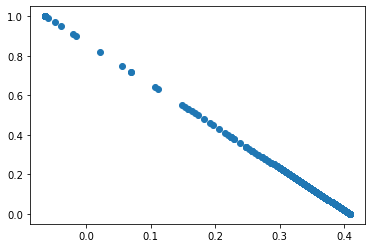

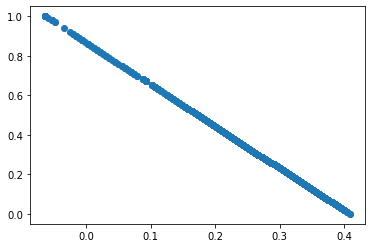

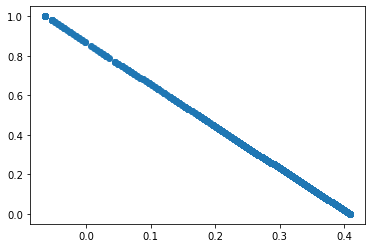

In [20]:
for i, var in enumerate (columnNames.values):
    modelledDependent = np.polyval([slope, intercept], features[var])
    plt.scatter(modelledDependent,features[var])
    plt.show()

In [21]:
pCoeff = np.polyfit(features['medIncome'], features['HispPerCap'], 2)
evaluatedCurve = np.polyval(pCoeff, y)

In [22]:
evaluatedCurve

array([[0.29856841],
       [0.55712671],
       [0.41650252],
       ...,
       [0.31301695],
       [0.29381451],
       [0.44432012]])

In [24]:
model = sm.OLS(y,x)
results = model.fit()

In [25]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.220
Model:                             OLS   Adj. R-squared (uncentered):              0.220
Method:                  Least Squares   F-statistic:                              563.5
Date:                 Wed, 16 Nov 2022   Prob (F-statistic):                   6.50e-110
Time:                         23:52:12   Log-Likelihood:                         -388.47
No. Observations:                 1994   AIC:                                      778.9
Df Residuals:                     1993   BIC:                                      784.5
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
medIncome      0.3746      0.016     23.739      0.000       0.344       0.406
==============================================================================
Omnibus:                      296.797   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.801
Skew:                           1.067   Prob(JB):                     2.59e-97
Kurtosis:                       3.893   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""